# Show Scoary genes has a lot of hypothetical genes that are not annotated by GO term

In [4]:
import pandas as pd
resist = pd.read_csv('~/data0118/scoary_summary/resist.csv', index_col = 0, header = 0)
combine_value = pd.read_csv('~/data0118/scoary_summary/combine_value.csv', index_col = 0, header = 0)
combine = pd.read_csv('~/data0118/scoary_summary/combine.csv', index_col = 0, header = 0)
gold_anno = pd.read_csv('/home/hermuba/data0118/goldstandard/ec_rmplasmid_node_anno.csv', header = 0, index_col = 0) 

In [5]:
combine.head()

,Cluster 4549,Cluster 9352,Cluster 14599,Cluster 8059,Cluster 9353,Cluster 7673,Cluster 5152,Cluster 4741,Cluster 15458,Cluster 11213,...,Cluster 5686,Cluster 17920,Cluster 18729,Cluster 30331,Cluster 29515,Cluster 13557,Cluster 8839,Cluster 17008,Cluster 3483,Cluster 27671
ceftazidime,-1,0,0,0,0,0,0,0,0,-1,...,1,1,1,0,0,0,1,-1,1,0
ciprofloxacin,0,0,0,-1,-1,-1,0,0,0,-1,...,1,1,1,1,0,1,1,-1,0,0
cefuroxime,0,1,0,0,0,0,0,0,0,-1,...,1,1,0,0,0,0,1,-1,1,0
meropenem,0,0,0,0,0,0,0,0,-1,0,...,0,0,0,0,0,0,1,-1,0,0
cefotaxime,-1,0,0,0,0,0,0,0,0,-1,...,1,1,1,1,1,1,1,-1,0,0


In [3]:
combine_value.head()

,Cluster 4549,Cluster 9352,Cluster 14599,Cluster 8059,Cluster 9353,Cluster 7673,Cluster 5152,Cluster 4741,Cluster 15458,Cluster 11213,...,Cluster 5686,Cluster 17920,Cluster 18729,Cluster 30331,Cluster 29515,Cluster 13557,Cluster 8839,Cluster 17008,Cluster 3483,Cluster 27671
ceftazidime,0.039278,1.00000,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,0.378935,...,8.474474,8.474474,8.611621,1.0,1.000000,1.0,14.756938,0.055040,2.138287,1.0
ciprofloxacin,1.000000,1.00000,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,0.404684,...,8.574394,8.574394,3.573495,1000.0,1.000000,1000.0,14.652105,0.070140,1.000000,1.0
cefuroxime,1.000000,1.58044,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,0.470522,...,7.993671,7.993671,1.000000,1.0,1.000000,1.0,4.986476,0.280755,1.936508,1.0
meropenem,1.000000,1.00000,1.0,1.0,1.0,1.0,1.0,1.0,0.406417,1.000000,...,1.000000,1.000000,1.000000,1.0,1.000000,1.0,9.338983,0.036756,1.000000,1.0
cefotaxime,1.000000,1.00000,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,0.254149,...,9.083333,9.083333,5.210789,1000.0,18.068966,1000.0,19.067919,0.101525,1.000000,1.0


# Three types of resistance-associated genes
1. cause resistant to many drugs
2. cause susceptible to many drugs
3. drug specific resist
4. drug specific suscept
5. bivalent (tradeoff)

In [8]:
df = pd.DataFrame()
for clus in combine.columns:
    df = df.append(combine[clus].value_counts())

In [10]:
df.fillna(0, inplace = True)

In [14]:
df.columns = df.columns.map({0:'Neutral', 1:'Resist', -1:'Suscept'})

In [39]:

L = g.dendrogram_row.linkage
# 0.2 can be modified to retrieve more stringent or relaxed clusters
clusters = sch.fcluster(L, 5, 'distance')

# clusters indicices correspond to incides of original df
cluster_lbl = pd.Series()
for i,cluster in enumerate(clusters):
    cluster_lbl[df.index[i]]=cluster

/home/hermuba/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


In [35]:
np.unique(cluster_lbl)

array([[0.00000000e+00, 7.00000000e+01, 0.00000000e+00, 2.00000000e+00],
       [1.00000000e+00, 3.11000000e+02, 0.00000000e+00, 2.00000000e+00],
       [2.00000000e+00, 6.00000000e+00, 0.00000000e+00, 2.00000000e+00],
       ...,
       [2.11580000e+04, 2.11700000e+04, 6.93102280e+00, 7.90100000e+03],
       [2.11710000e+04, 2.11720000e+04, 1.12510130e+01, 9.59400000e+03],
       [2.11690000e+04, 2.11730000e+04, 1.32650929e+01, 1.05880000e+04]])

In [42]:
df.sort_values(by = 'Resist')

,Suscept,Neutral,Resist
Cluster 4549,4.0,17.0,0.0
Cluster 18483,2.0,19.0,0.0
Cluster 5688,2.0,19.0,0.0
Cluster 5179,2.0,19.0,0.0
Cluster 4811,2.0,19.0,0.0
...,...,...,...
Cluster 6669,0.0,1.0,20.0
Cluster 26909,0.0,1.0,20.0
Cluster 2936,0.0,1.0,20.0
Cluster 21586,0.0,1.0,20.0


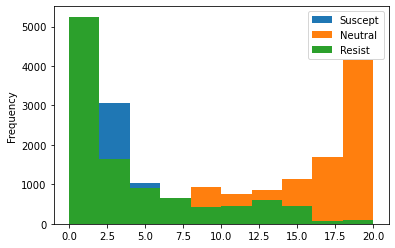

In [63]:
df.plot(kind = 'hist')

In [81]:
general_purpose_resist = df.loc[(df['Resist'] > 10) & (df['Suscept'] == 0)]
general_purpose_suscept = df.loc[df['Suscept'] > 10 & (df['Resist'] == 0)]
specific_purpose_resist = df.loc[(df['Resist'] <= 3) & (df['Suscept'] == 0)]
specific_purpose_suscept = df.loc[(df['Suscept'] <= 3) & (df['Resist'] == 0)]
tradeoff = df.loc[(df['Suscept'] >= 4) & (df['Resist'] >= 4)]

five_groups = {'General Resist': general_purpose_resist,
              'General Suscept': general_purpose_suscept,
              'Specific Resist': specific_purpose_resist,
              'Specific Suscept': specific_purpose_suscept,
              'Tradeoff': tradeoff}

In [49]:
general_purpose_resist.shape

(1441, 3)

In [50]:
general_purpose_suscept.shape

(6080, 3)

In [79]:
tradeoff.shape

(53, 3)

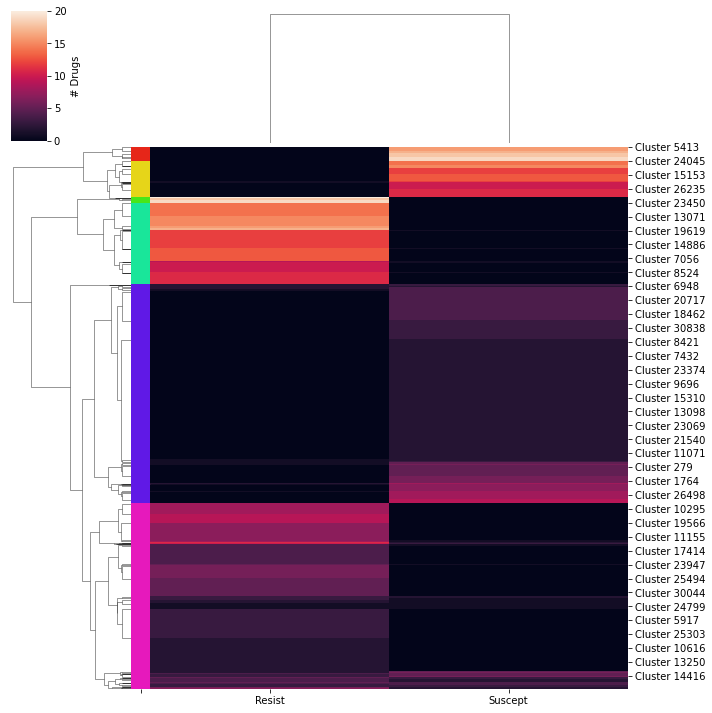

In [40]:
import seaborn as sns
labels = cluster_lbl.values
lut = dict(zip(set(labels), sns.hls_palette(len(set(labels)), l=0.5, s=0.8)))
g = sns.clustermap(df[['Resist', 'Suscept']], cbar_kws={'label': '# Drugs'}, row_colors = cluster_lbl.map(lut))

# Gene Ontology Analysis

In [93]:
def extract_anno(df):
    ''' return percentage to GO annotations'''
    clus_name = df.index.tolist()
    anno_subset = gold_anno.loc[gold_anno['cluster'].isin(clus_name)]
    
    return anno_subset
def anno_stat(anno_subset):
    go_perc = anno_subset['GO'].count()/anno_subset.shape[0]
    hypo_perc = anno_subset['hypo_nr'].count()/anno_subset.shape[0]
    card_perc = anno_subset['is_card'].sum()/anno_subset.shape[0]
    resfam_perc = anno_subset['resfam'].count()/anno_subset.shape[0]
    
    return [go_perc, hypo_perc, card_perc, resfam_perc, anno_subset.shape[0]]
def extract_go_term(series):
    ''' extract all go term'''
    # remove nan
    series.dropna(inplace = True)
    
    all_go_terms = set()
    for sid in series.index:
        go = series[sid]
        #go = go.split(',')
        #go = [g.replace('{','').replace('}','').replace('\'','').replace('\"','') for g in go]
        #series[sid] = go
        all_go_terms = all_go_terms.union(go)
        #print(all_go_terms)
    # make into table
    df = pd.DataFrame(index = series.index, columns = all_go_terms)
    for sid in series.index:
        df.loc[sid, list(series[sid])] = True
    df.fillna(False, inplace =True)
    
    return(df)    

In [94]:
five_groups_anno = {}
five_groups_stat = pd.DataFrame(index = five_groups.keys(), columns = ['%GO', '%hypo', '%CARD', '%Resfam', '#Gene'])
for g in five_groups.keys():
    anno = extract_anno(five_groups[g])
    five_groups_anno[g] = anno
    five_groups_stat.loc[g] = anno_stat(anno)
    

In [95]:
five_groups_stat.head()

,%GO,%hypo,%CARD,%Resfam,#Gene
General Resist,0.357391,0.447606,0.0138793,0.0346981,1441
General Suscept,0.566612,0.272039,0.00542763,0.0664474,6080
Specific Resist,0.244681,0.566285,0.00490998,0.0302782,1222
Specific Suscept,0.711553,0.15894,0.00956586,0.0835173,2718
Tradeoff,0.226415,0.716981,0,0.0566038,53


In [113]:
five_groups_stat.to_csv('/home/hermuba/data0118/fig/scoary_groups/stats.csv')

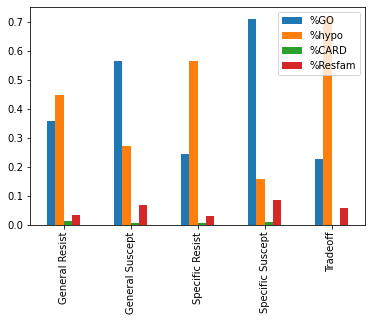

In [115]:
five_groups_stat.iloc[:, :-1].plot(kind = 'bar')

# Run GO enrichment

[Tutorial on GOATTOOL](https://github.com/tanghaibao/goatools/blob/master/notebooks/goea_nbt3102.ipynb)

In [98]:
onto_root = '/home/hermuba/data0118/ontologies/'
from goatools.obo_parser import GODag
obodag = GODag(onto_root + "go-basic.obo")

from goatools.associations import read_associations
ns2assoc = read_associations('/home/hermuba/data0118/ontologies/ec_rmplasmid.id2go', anno_type='id2gos', namespace = 'BP', no_top=True)

/home/hermuba/data0118/ontologies/go-basic.obo: fmt(1.2) rel(2019-07-01) 47,413 GO Terms
HMS:0:00:00.973503  26,164 annotations READ: /home/hermuba/data0118/ontologies/ec_rmplasmid.id2go 
**ERROR IdToGosReader(..., godag=None).get_id2gos: GODAG is None. IGNORING namespace(BP)

10044 IDs in all associations

In [103]:
# run for all 
outdir = '/home/hermuba/data0118/fig/goenrich/'
from goatools.go_enrichment import GOEnrichmentStudy 
from goatools.godag_plot import plot_gos, plot_results, plot_goid2goobj


for g in five_groups_anno.keys():
    
    # start new study object
    goea = GOEnrichmentStudy(gold_anno.index.tolist(), ns2assoc, obodag, propagate_counts = False,
        alpha = 0.05, # default significance cut-off
        methods = ['fdr_bh'])
    
    # run
    results_nt = goea.run_study(five_groups_anno[g].index.tolist())
    
    # filter to significant 
    goea_results_sig = [r for r in results_nt if r.p_fdr_bh < 0.05]
    
    # plot it
    plot_results(outdir+g+"_{NS}.png", goea_results_sig)
    
    # write text to file
    go_id = [g.GO for g in goea_results_sig]
    goresult_df = pd.DataFrame([[obodag[gid].name, obodag[gid].namespace, gid] for gid in go_id], columns = ['Name', 'Namespace', 'ID'])
    goresult_df.to_csv(outdir+g+'.csv')
    


Load GOEA Gene Ontology Analysis ...
fisher module not installed.  Falling back on scipy.stats.fisher_exact
 32% 10,044 of 31,621 population items found in association

Run GOEA Gene Ontology Analysis: current study set of 1441 IDs ... 36%    515 of  1,441 study items found in association
100%  1,441 of  1,441 study items found in population(31621)
Calculating 2,067 uncorrected p-values using fisher_scipy_stats
   2,067 GO terms are associated with 10,044 of 31,621 population items
     286 GO terms are associated with    515 of  1,441 study items
  METHOD fdr_bh:
       8 GO terms found significant (< 0.05=alpha) (  8 enriched +   0 purified): statsmodels fdr_bh
     191 study items associated with significant GO IDs (enriched)
       0 study items associated with significant GO IDs (purified)
    4 usr  29 GOs  WROTE: /home/hermuba/data0118/fig/goenrich/General Resist_BP.png
    4 usr  18 GOs  WROTE: /home/hermuba/data0118/fig/goenrich/General Resist_MF.png

Load GOEA Gene Ontology 

# output genes

In [112]:
for g in five_groups_anno:
    five_groups_anno[g].to_csv('/home/hermuba/data0118/fig/scoary_groups/{}_anno.csv'.format(g.replace(' ', '_')))

In [135]:
five_groups_anno[g].columns

Index(['cog_ID', 'cog_category', 'cluster', 'count', 'core', 'loose_best_ARO',
       'loose_ARO', 'strict_best_ARO', 'strict_ARO', 'is_card', 'resfam',
       'aclame_title', 'is_aclame', 'nr', 'hypo_nr', 'drug_target',
       'is_drug_target', 'GO', 'pathway', 'domain'],
      dtype='object')